In [1]:
import tensorflow as tf # Library for constructing NNs
from tensorflow import keras
import cv2 # Opencv -> Open soruce library for machine learning and computer vision
import imghdr # Used to identify image type
import os # Allows interaction with operating system
import matplotlib.pyplot as plt # Python vizualtion library
import numpy as np # Array processing package

## View directories that contain the images for the model

In [2]:
os.listdir('images') # View all image classes in images directory

['bloodelfs', 'nightelfs']

In [3]:
bloodelfs = os.listdir('images/bloodelfs') # Get List of all images in bloodelfs directory
print('Bloodelf Image Count:', len(bloodelfs))
bloodelfs

Bloodelf Image Count: 123


['13224-blood-elf-customization-golden-eyes-and-three-new-faces.jpg',
 '1462053377.nihalehalvmaane_belfface_copy3.png',
 '19165-new-blood-elf-male-character-customizations-hairstyles-facial-hair-ear-size.jpg',
 '22940-male-blood-elf-face-changes-in-9-0-5-result-in-perpetual-smirk-on-all-faces.jpg',
 '36602-blood-elf-customization-options-in-battle-for-azeroth.jpg',
 '43r434bbumzdg.jpg',
 '623cc4984dad4eb88a850e87606b10b9.jpg',
 '716424.jpg',
 '716709.jpg',
 '726358.jpg',
 '938412.jpg',
 '938436.jpg',
 '938509.jpg',
 '97i12r48g0t01.png',
 'B3ZQ-1fCcAAfItR.jpg',
 'beFace04.jpg',
 'Belf-Customization-Options-WoW.png',
 'belf1.JPG',
 'bemale1.thumb.JPG.8a42a358a1d5115a93f99f27713c68cf.JPG.jpg',
 'bemale2.thumb.JPG.01fd0b2929eeaefbfb5dfc2d52d5cb30.JPG.jpg',
 'cltl37s3cx201.jpg',
 'dyh2m0z4xiq51.jpg',
 'DZViTMcVAAAtluT.jpg',
 'escyuw6g0ty41.png',
 'flat750x075f-pad750x1000f8f8f8.jpg',
 'FNmYR8sXIAwn6ZN.jpg',
 'FvnxUeaXsB4YWez.png',
 'glenn-rane-wowx-cover-bloodelf-thefinal-copy.jpg',
 'hFjTy

In [4]:
nightelfs = os.listdir('images/nightelfs') # Get List of all images in nightelfs directory
print('Bloodelf Image Count:', len(nightelfs))
nightelfs

Bloodelf Image Count: 126


['0baf62c1303b33dffecdf786816f5d280538ed29_00.jpg',
 '1045661.jpg',
 '1045663.jpg',
 '1115628.jpg',
 '14663.jpg',
 '14664.jpg',
 '2459550-bigthumbnail.jpg',
 '2533902-bigthumbnail.jpg',
 '3-2.jpg',
 '34-1-1.png',
 '406391.jpg',
 '4fRv8uj.png',
 '6.2modelupdates.png',
 '638202810249294313.jpeg',
 '74187-a-preview-of-new-night-elf-face-markings-in-patch-1017.jpg',
 '7aML2Qw.png',
 '7m3pis1dw6n11.jpg',
 '85a4eb2b6b95d66538b13caf7c893419.jpg',
 '8d799ff3a06908b4d02e20641cfc3482.jpg',
 '8NAcKfa.jpg',
 '946464.jpg',
 '949162.jpg',
 '988fe05b504de6795f35d68f7293e355.png',
 'a78b9ac530d11408e7672c6507056dbf.jpg',
 'axvNKX0.png',
 'b31df5a1cc1a99d5d988035171337bf6.jpg',
 'bella-bergolts---night-elf---digitalart------30032018075316.jpg',
 'bnmnmbnm.png',
 'chen-wang-s05.jpg',
 'EcKdvPRXgAApEGg.jpg',
 'EXh9ztzX0AAPxXc.jpg',
 'F7PV2WAINZGBW13.jpg',
 'fanfoxy-a-by-fanfoxy-a-neyshira-characters-fantasy-illustrat.jpg',
 'ff7.thumb.png.a1846a20c13ebbddc7d13010efe427a8.png',
 'flat750x075f-pad750x1000f

<class 'numpy.ndarray'>
(242, 209, 3)
[[[68 68 68]
  [68 68 68]
  [68 68 68]
  ...
  [69 71 72]
  [79 79 85]
  [77 77 77]]

 [[68 68 68]
  [68 68 68]
  [69 69 69]
  ...
  [75 76 80]
  [76 76 82]
  [77 77 77]]

 [[69 69 69]
  [69 69 69]
  [69 69 69]
  ...
  [80 81 85]
  [72 71 80]
  [77 77 77]]

 ...

 [[90 67 71]
  [89 68 71]
  [83 69 71]
  ...
  [21 21 75]
  [ 0  0 47]
  [ 1  0 62]]

 [[71 71 71]
  [71 71 71]
  [71 71 71]
  ...
  [ 0  1 59]
  [ 0  1 59]
  [ 0  0 60]]

 [[71 71 71]
  [71 71 71]
  [71 71 71]
  ...
  [ 0  1 59]
  [ 0  1 59]
  [ 0  0 60]]]


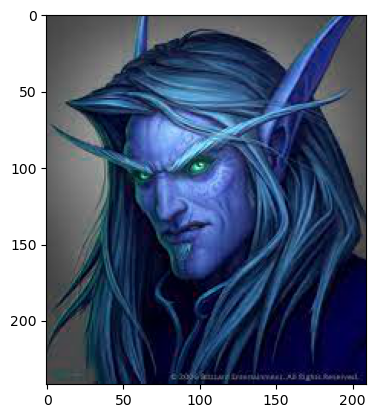

In [5]:
# Demonstrating how opencv works with imread
img = cv2.imread('images/bloodelfs/image22.jpeg')
print(type(img))
print(img.shape)# in pixels: (height, width, dimension (3 means it is a colored image))
print(img)
plt.imshow(img) # Opencv by defaults reads colors as BGR not RBG

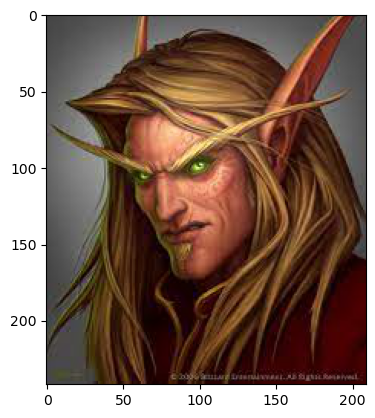

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Make Opencv read color as RGB and not BGR

## Clean up any potentially corrupted or bad files

In [7]:
count_invalid_type = 0 # Used to count how many files are removed due to invalid type
count_exception = 0 # Used to cont how many files are removed due to exceptions reading the images
images_removed = {} # Stores the path and type of removed images in a dictionary. {path : type}
print('Removing bad or corrupted images...')
for image_dir in os.listdir('images'): # For each directory in the image directory
    image_dir_path = 'images/' + image_dir
    for image in os.listdir(image_dir_path): # For each image in image class
        image_path = image_dir_path + '/' + image
        try: # Attempt to open file and retrieve file type
            image_check = cv2.imread(image_path) # Open image as a numpy array. See above
            type_check = imghdr.what(image_path) # Obtain file extension
            if type_check not in ['bmp', 'png', 'jpeg', 'jpg']: # If not a valid file extension
                count_invalid_type += 1 # Increment invalid image counter
                images_removed[image_path] = type_check # Add to removed images list
                os.remove(image_path) # remove image from directory
        except Exception as e: # Catch any exceptions when trying to open and retrieve image extension
            count_exception += 1 # increment exception count
            images_removed[image_path] = None # Add to removed images list
            os.remove(image_path) # remove image from directory
print('Images removed due to invalid type:', count_invalid_type)
print('Images removed due to issues opening image:', count_exception)
print('Total removed images:', count_exception + count_invalid_type, end ='\n\n')
print(images_removed)

Removing bad or corrupted images...
Images removed due to invalid type: 0
Images removed due to issues opening image: 0
Total removed images: 0

{}


In [8]:
print('Bloodelf Image Count:', len(os.listdir('images/bloodelfs')))
print('Nightelf Image Count:', len(os.listdir('images/nightelfs')))

Bloodelf Image Count: 123
Nightelf Image Count: 126


## Load Data Using Keras

In [9]:
# data = keras.utils.image_dataset_from_directory?? -> Documnetation

The keras.utils.image_dataset_from_directory does the following:
* Shuffle Dataset
    * All image sets are labeled, combined, and then shuffled
* Create batches of size 32
* rescale the image to (256, 256)

In [10]:
# data = keras.utils.image_dataset_from_directory('images', color_mode='grayscale')
data = keras.utils.image_dataset_from_directory('images')

Found 249 files belonging to 2 classes.


In [11]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
data_iterator = data.as_numpy_iterator() # Since you cannot access elements directly, you can transform it into a numpy iterator
data_iterator

In [13]:
batch = data_iterator.next() # Grab a batch of 32 images
batch

(array([[[[ 22.       ,  22.       ,  22.       ],
          [ 22.       ,  22.       ,  22.       ],
          [ 22.       ,  22.       ,  22.       ],
          ...,
          [  5.92749  ,   5.92749  ,   5.92749  ],
          [  0.       ,   0.       ,   0.       ],
          [  8.588623 ,   8.588623 ,   8.588623 ]],
 
         [[ 22.       ,  22.       ,  22.       ],
          [ 22.       ,  22.       ,  22.       ],
          [ 22.       ,  22.       ,  22.       ],
          ...,
          [  1.       ,   1.       ,   1.       ],
          [  4.04541  ,   4.04541  ,   4.04541  ],
          [  3.7424316,   3.7424316,   3.7424316]],
 
         [[ 22.       ,  22.       ,  22.       ],
          [ 22.       ,  22.       ,  22.       ],
          [ 22.       ,  22.       ,  22.       ],
          ...,
          [  0.65625  ,   0.65625  ,   0.65625  ],
          [  0.5612793,   0.5612793,   0.5612793],
          [ 22.443115 ,  22.443115 ,  22.443115 ]],
 
         ...,
 
         [[2

In [14]:
len(batch)

2

In [15]:
batch[0] # batch[0] is all of our images

array([[[[ 22.       ,  22.       ,  22.       ],
         [ 22.       ,  22.       ,  22.       ],
         [ 22.       ,  22.       ,  22.       ],
         ...,
         [  5.92749  ,   5.92749  ,   5.92749  ],
         [  0.       ,   0.       ,   0.       ],
         [  8.588623 ,   8.588623 ,   8.588623 ]],

        [[ 22.       ,  22.       ,  22.       ],
         [ 22.       ,  22.       ,  22.       ],
         [ 22.       ,  22.       ,  22.       ],
         ...,
         [  1.       ,   1.       ,   1.       ],
         [  4.04541  ,   4.04541  ,   4.04541  ],
         [  3.7424316,   3.7424316,   3.7424316]],

        [[ 22.       ,  22.       ,  22.       ],
         [ 22.       ,  22.       ,  22.       ],
         [ 22.       ,  22.       ,  22.       ],
         ...,
         [  0.65625  ,   0.65625  ,   0.65625  ],
         [  0.5612793,   0.5612793,   0.5612793],
         [ 22.443115 ,  22.443115 ,  22.443115 ]],

        ...,

        [[210.02563  , 179.61938  , 10

In [16]:
len(batch[0]) # How many images, in this batch (is 32 by default)

32

In [17]:
batch[0].shape # Remember, using image_dataset_from_directory scales images to be 256,256

(32, 256, 256, 3)

In [18]:
batch[1] # The class each image belongs to

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

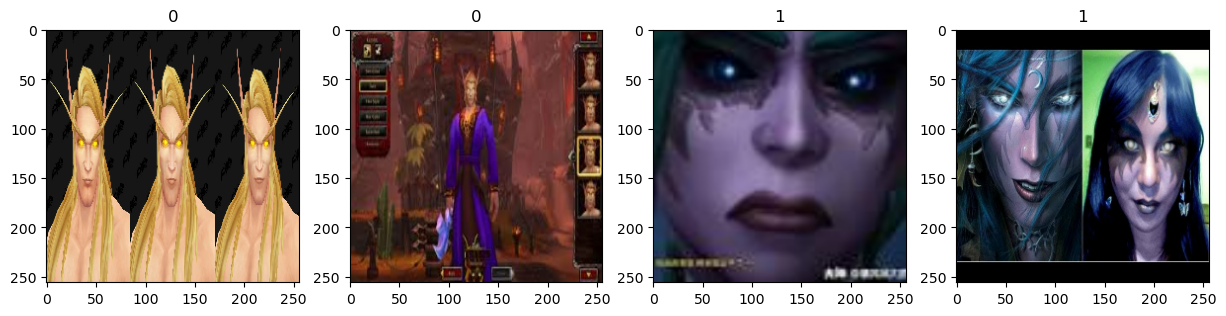

In [19]:
# I was unable to find a simple way to figure out which class got which label, so I decided to go with the unoptimal way below
# Below image will print 2 images of each class
# From this we can see that Class 0 = Bloodelf & Class 1 = Nightelf
class_0_count, class_1_count = 0, 0
i = 0
plot_count = 0
fig, ax = plt.subplots(ncols=4, figsize=(15,15))

while class_0_count + class_1_count < 4: # While there are less then 4 images plotted
    if batch[1][i] == 0 and class_0_count < 2: # Check for class 0 image
        class_0_count += 1
        ax[plot_count].imshow(batch[0][i].astype(np.int64))
        ax[plot_count].title.set_text(batch[1][i])
        plot_count += 1
    if batch[1][i] == 1 and class_1_count < 2: # Check for class 1 image
        class_1_count += 1
        ax[plot_count].imshow(batch[0][i].astype(np.int64))
        ax[plot_count].title.set_text(batch[1][i])
        plot_count += 1
    i += 1

## Scaling Image Values

In [20]:
# Values are currently between 0 and 255. We want to scale hem between 0 and 1
# This will improve speed and acurracy of model
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [21]:
# This function will take an image and divide it by 255
# This will return the image with normalized values and unchanged labels
def normalize(image, label):
    image = tf.cast(image/255.0 , tf.float32) # Must ensure result is a float not an int or value will be truncated to 0
    return image,label

In [22]:
data = data.map(normalize) # Calls the normalized function above on each element of our data
data.as_numpy_iterator().next() # Print the data to ensure data is normalized

(array([[[[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          ...,
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],
 
         [[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          ...,
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],
 
         [[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
          ...,
          [3.92156886e-03, 3.92156886e-03, 3.9215

In [23]:
# You can see below that our min and max values are now normalized between 0 and 1
temp_data_iter = data.as_numpy_iterator().next()[0]
min_val = temp_data_iter.min()
max_val = temp_data_iter.max()
print('Min Val Afte Scaling:', min_val)
print('Max Val After Scaling:', max_val)

Min Val Afte Scaling: 0.0
Max Val After Scaling: 1.0


## Splitting Data

In [24]:
print('Batches Count:',len(data)) # This is how many batches we have

Batches Count: 8


In [25]:
train_batches = 6 # ~75%
validation_batches = 1 # ~12%
test_batches = 1 # ~12%
print('All batches are being used:', train_batches + validation_batches + test_batches == len(data)) # Ensure that all batches are being utilized

All batches are being used: True


In [26]:
# Data is already shuffled so we can create Train, Validation, and Test splits
train = data.take(train_batches) # Take 'train_batches' number of batches
validation = data.skip(train_batches).take(validation_batches) # Skip the batches taken for train data and take 'validation_batches' amount of batches
test = data.skip(train_batches + validation_batches).take(test_batches)  # Skip the batches taken for train and validation data and take 'test_batches' amount of batches
print('Train Size:', len(train))
print('Validation Size:', len(validation))
print('Test Size:', len(test))

Train Size: 6
Validation Size: 1
Test Size: 1


## Building the model

In [27]:
model = keras.models.Sequential([
    # Input Layer
    keras.layers.Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256,256,3)), # 16, 3 by 3 kernal with a stride of 1
    
    # Hidden Layers
    keras.layers.MaxPooling2D(), # Take max value in input window
    keras.layers.Conv2D(16, (3,3), 1, activation='relu'), # 16, 3 by 3 kernal with a stride of 1
    keras.layers.MaxPooling2D(), # Take max value in input windo
    keras.layers.Conv2D(32, (3,3), 1, activation='relu'), # 16, 3 by 3 kernal with a stride of 1
    keras.layers.MaxPooling2D(), # Take max value in input window
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    
    # Output Layers
    keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
# We are doing Binary classifaction so loss will be BinaryCrossentropy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

* Notice that max pooling does not have any trainable params
* Also flatten takes the output of the previous layer and makes it 1D array containing all the elements
    * The 1D array in this case will have 30 x 30 x 16 = 14400

## Training The model

In [30]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # Allow saving of logs into a new directory

In [31]:
history = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback]) # Train the model with 20 epochs

Epoch 1/20
6/6 [==============================] - 5s 629ms/step - loss: 1.0938 - accuracy: 0.4688 - val_loss: 0.6341 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 3s 371ms/step - loss: 0.5412 - accuracy: 0.8333 - val_loss: 0.4303 - val_accuracy: 0.8125
Epoch 3/20
6/6 [==============================] - 2s 324ms/step - loss: 0.3999 - accuracy: 0.8438 - val_loss: 0.4091 - val_accuracy: 0.8125
Epoch 4/20
6/6 [==============================] - 2s 311ms/step - loss: 0.3535 - accuracy: 0.8698 - val_loss: 0.3658 - val_accuracy: 0.9375
Epoch 5/20
6/6 [==============================] - 2s 298ms/step - loss: 0.3361 - accuracy: 0.8802 - val_loss: 0.1126 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 2s 307ms/step - loss: 0.2309 - accuracy: 0.9062 - val_loss: 0.1486 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 2s 304ms/step - loss: 0.1844 - accuracy: 0.9427 - val_loss: 0.2784 - val_accuracy: 0.8750
Epoch 8/20
6/6 [====

In [32]:
history.history

{'loss': [1.0937987565994263,
  0.541239857673645,
  0.39986416697502136,
  0.3535383641719818,
  0.33609747886657715,
  0.23090779781341553,
  0.1843622773885727,
  0.20427095890045166,
  0.17225003242492676,
  0.1350651979446411,
  0.07210009545087814,
  0.10924925655126572,
  0.05080553516745567,
  0.06445316970348358,
  0.04381093010306358,
  0.03692884370684624,
  0.013245920650660992,
  0.008201072923839092,
  0.015585259534418583,
  0.015603420324623585],
 'accuracy': [0.46875,
  0.8333333134651184,
  0.84375,
  0.8697916865348816,
  0.8802083134651184,
  0.90625,
  0.9427083134651184,
  0.9427083134651184,
  0.9322916865348816,
  0.953125,
  0.984375,
  0.96875,
  0.984375,
  0.9895833134651184,
  0.9895833134651184,
  0.9947916865348816,
  1.0,
  1.0,
  0.9947916865348816,
  1.0],
 'val_loss': [0.634077250957489,
  0.43025633692741394,
  0.40912926197052,
  0.3657853603363037,
  0.11256963014602661,
  0.14862371981143951,
  0.2783582806587219,
  0.08092635124921799,
  0.206897

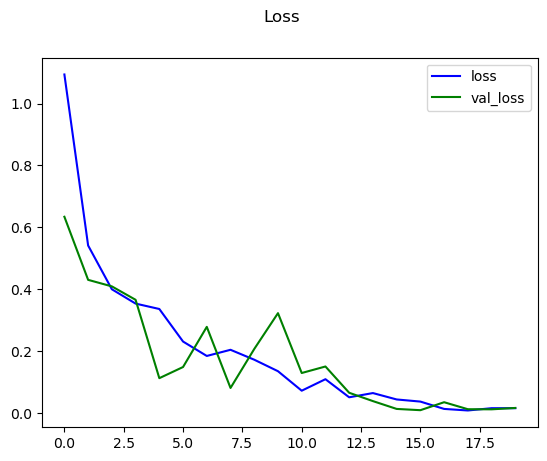

In [33]:
# Can plot performance of our model
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss')
plt.legend(loc="upper right")
plt.show()

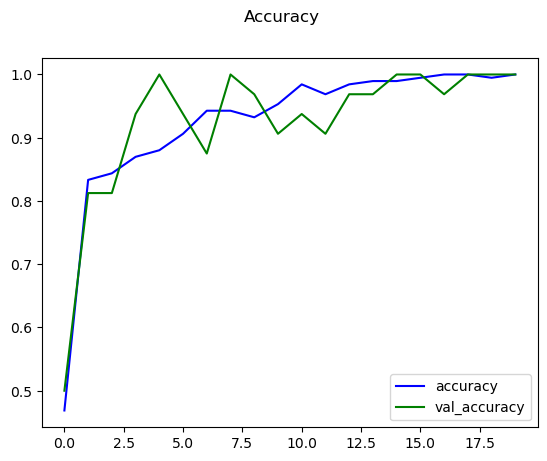

In [34]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc="lower right")
plt.show()

## Evaluating Model

In [35]:
precision = tf.keras.metrics.Precision() # Used for evaluating Precision of model
recall = tf.keras.metrics.Recall() # Used for evaluating Recall of model
accuracy = tf.keras.metrics.BinaryAccuracy() # Used for evaluating Accuracy of model

In [36]:
for batch in test.as_numpy_iterator():
    image, true_label = batch
    prediction_label = model.predict(image)
    precision.update_state(true_label, prediction_label)
    recall.update_state(true_label, prediction_label)
    accuracy.update_state(true_label, prediction_label)
print('Precision:', precision.result().numpy())
print('Recall:', recall.result().numpy())
print('Accuracy:', accuracy.result().numpy())

1/1 [==============================] - 0s 139ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


## Testing Model

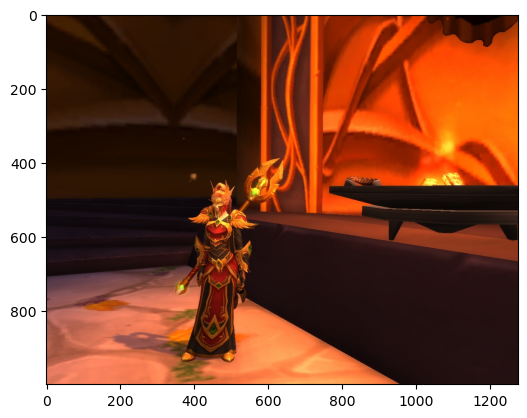

In [37]:
last_image_name = os.listdir('test_data/test')[-1]
last_image = cv2.imread('test_data/test/{}'.format(last_image_name))
plt.imshow(cv2.cvtColor(last_image, cv2.COLOR_BGR2RGB))

In [38]:
img.shape

(242, 209, 3)

(256, 256, 3)


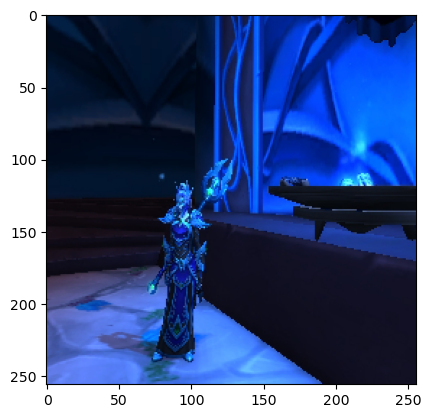

In [39]:
img_resize = tf.image.resize(last_image, (256,256), method='nearest')
print(img_resize.shape)
# img_resize = tf.image.rgb_to_grayscale(img_resize)
plt.imshow(img_resize)
plt.show()

In [40]:
testing_images = keras.utils.image_dataset_from_directory('test_data', shuffle=False)

Found 1 files belonging to 1 classes.


In [41]:
testing_images = testing_images.map(normalize)

In [42]:
predicition = model.predict(testing_images.as_numpy_iterator().next()[0])[-1]
print('Prediction Value:', predicition[0])
is_bloodelf = predicition[0] < 0.5
predicition_label = None
if is_bloodelf:
    predicition_label = 'BLOOD ELF'
else:
    predicition_label = 'NIGHT ELF'

1/1 [==============================] - 0s 18ms/step
Prediction Value: 0.012111335


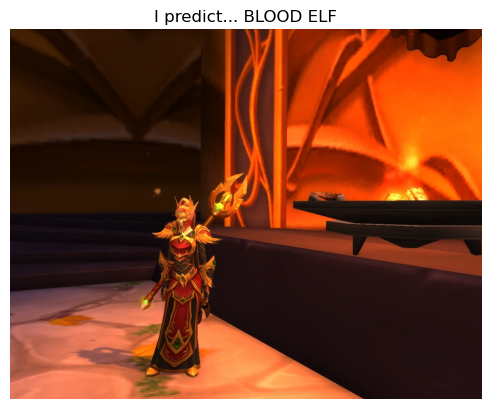

In [43]:
plt.imshow(cv2.cvtColor(last_image, cv2.COLOR_BGR2RGB))
plt.title('I predict... {}'.format(predicition_label))
plt.axis('off')
plt.show()

Issues I found during this project:
* Many nightelf pictures were dark so any "darker image" regardless of if it was nightelf vs bloodelf would most likley predict nightelf
* Many nightelf pictures had a very purple color scheme, so images with alot of purple would most likley be guessed as nightelf
* Many bloodelf pictures were light so any "lighter image" regardless of if it was nightelf vs bloodelf would most likley predict bloodelf
* Many bloodelf pictures had a very red and gold color scheme, so images with alot of those colors would most likley be guessed as bloodelf
* Making the images grayscale did not fix the above problems because grayscale can still detect how bright or dark an image is

The above is not necessarily bad because the theme of nightelf and bloodelfs in game are moon and sun respectivley, so this color scheme is intended and often represntative in the race and armor design

Possible ways to improve model:
* Add more pictures with varying background color
* Add more pictures with varying color schemes
* Add mix of greyscale and rbg images
* Add a mix of rotated images of character models
* Change hyper paramaters